# **EMI Stress Analysis of Approved Loan Borrowers**

# **1. Introduction**

Even among approved borrowers, certain segments: low to mid income borrowers, short-term loans, debt consolidation or credit card loans, and high revolving credit users carry higher EMI stress and default risk.

Credit grades do not fully capture this vulnerability. Banks need a data driven approach to identify these at-risk borrowers, monitor their repayment behavior, and implement proper measures to reduce defaults.

# **2. Data Understanding and Cleaning**

**Overview of the dataset**

In [ ]:
describe loan_new;


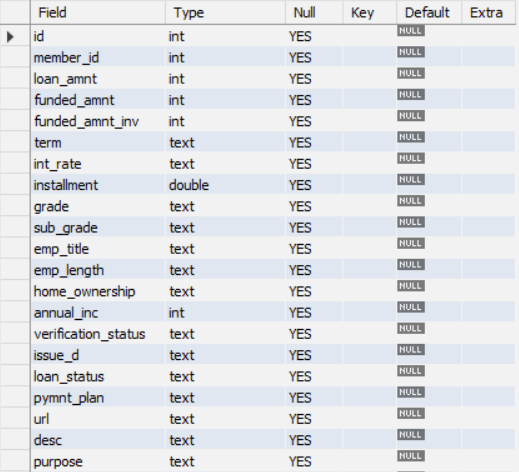

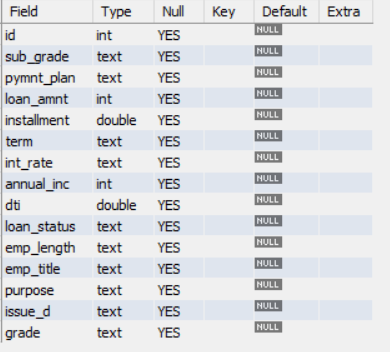

In [ ]:
SELECT COUNT(*) FROM loan_new;
select * from loan_new limit 5;

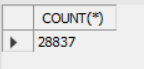

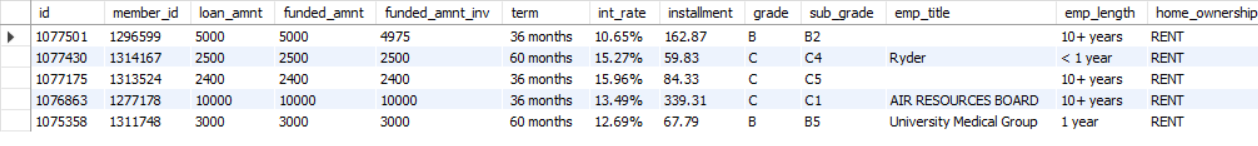

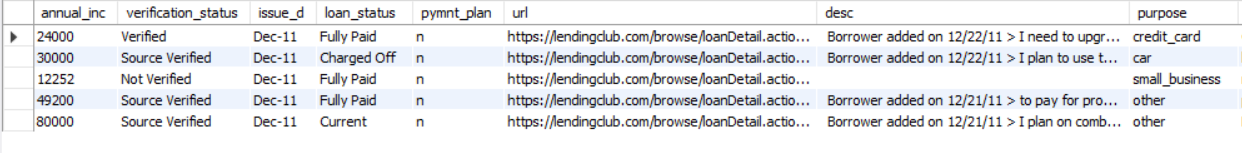

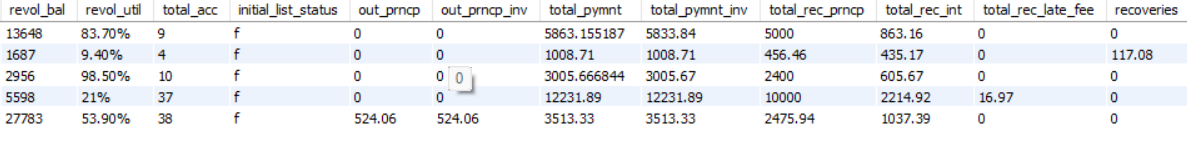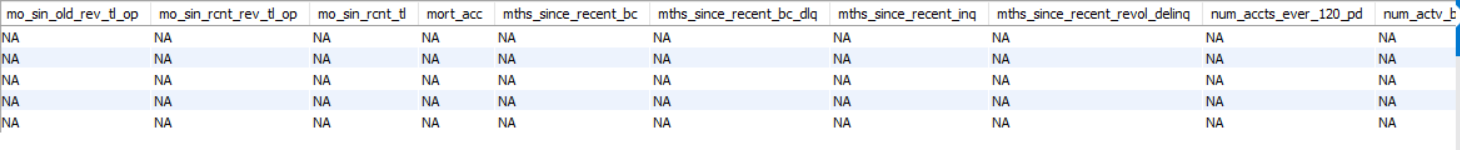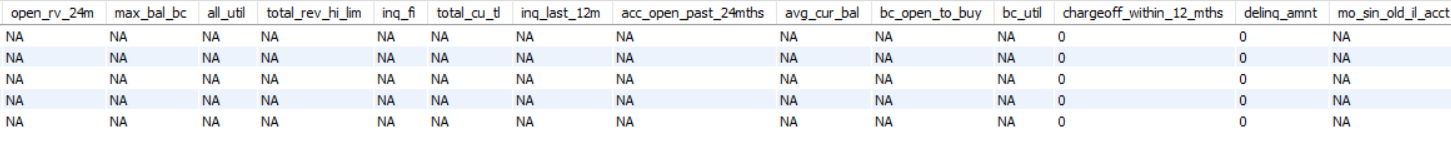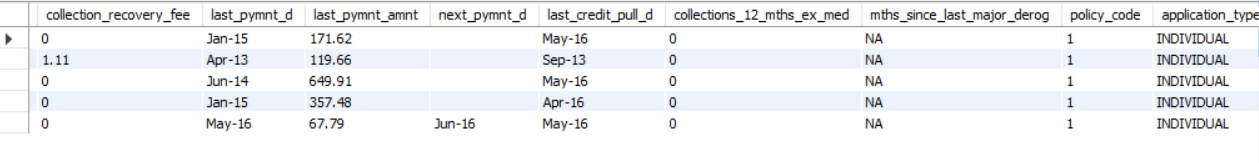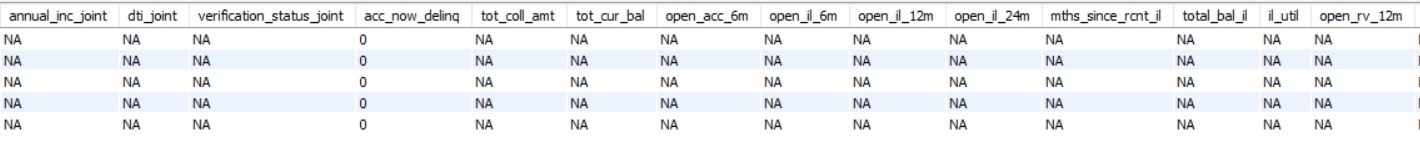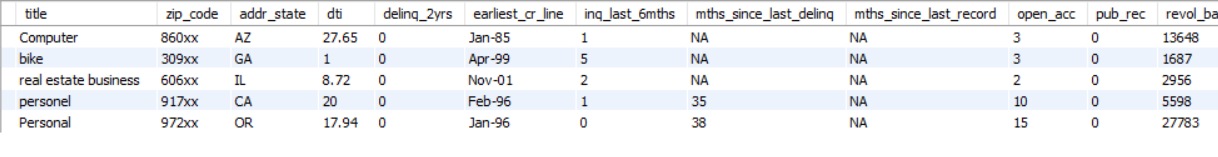

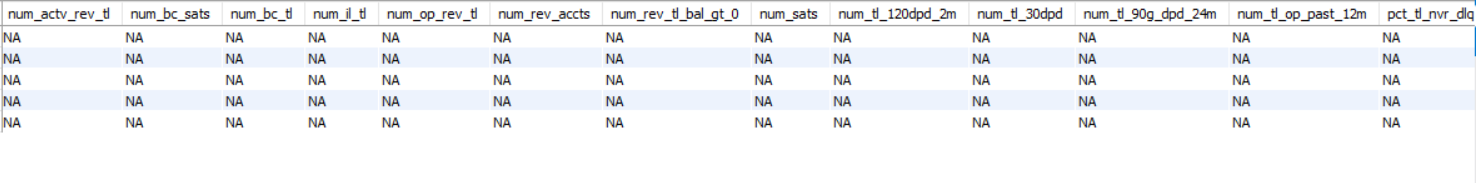



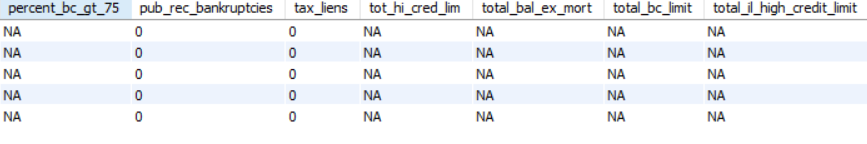

**Dropping all of the unecessary columns**

In [ ]:
ALTER TABLE loan_new
DROP COLUMN member_id,
DROP COLUMN funded_amnt,
DROP COLUMN funded_amnt_inv,
DROP COLUMN url,
DROP COLUMN `desc`,
DROP COLUMN title,
DROP COLUMN zip_code,
DROP COLUMN addr_state,
DROP COLUMN delinq_2yrs,
DROP COLUMN earliest_cr_line,
DROP COLUMN inq_last_6mths,
DROP COLUMN mths_since_last_delinq,
DROP COLUMN mths_since_last_record,
DROP COLUMN open_acc,
DROP COLUMN pub_rec,
DROP COLUMN revol_bal,
DROP COLUMN total_acc,
DROP COLUMN initial_list_status,
DROP COLUMN out_prncp,
DROP COLUMN out_prncp_inv,
DROP COLUMN total_pymnt,
DROP COLUMN total_pymnt_inv,
DROP COLUMN total_rec_prncp,
DROP COLUMN total_rec_int,
DROP COLUMN total_rec_late_fee,
DROP COLUMN recoveries,
DROP COLUMN collection_recovery_fee,
DROP COLUMN last_pymnt_d,
DROP COLUMN last_pymnt_amnt,
DROP COLUMN next_pymnt_d,
DROP COLUMN last_credit_pull_d,
DROP COLUMN collections_12_mths_ex_med,
DROP COLUMN mths_since_last_major_derog,
DROP COLUMN policy_code,
DROP COLUMN application_type,
DROP COLUMN annual_inc_joint,
DROP COLUMN dti_joint,
DROP COLUMN verification_status_joint,
DROP COLUMN acc_now_delinq,
DROP COLUMN tot_coll_amt,
DROP COLUMN tot_cur_bal,
DROP COLUMN open_acc_6m,
DROP COLUMN open_il_6m,
DROP COLUMN open_il_12m,
DROP COLUMN open_il_24m,
DROP COLUMN mths_since_rcnt_il,
DROP COLUMN total_bal_il,
DROP COLUMN il_util,
DROP COLUMN open_rv_12m,
DROP COLUMN open_rv_24m,
DROP COLUMN max_bal_bc,
DROP COLUMN all_util,
DROP COLUMN total_rev_hi_lim,
DROP COLUMN inq_fi,
DROP COLUMN total_cu_tl,
DROP COLUMN inq_last_12m,
DROP COLUMN acc_open_past_24mths,
DROP COLUMN avg_cur_bal,
DROP COLUMN bc_open_to_buy,
DROP COLUMN bc_util,
DROP COLUMN chargeoff_within_12_mths,
DROP COLUMN delinq_amnt,
DROP COLUMN mo_sin_old_il_acct,
DROP COLUMN mo_sin_old_rev_tl_op,
DROP COLUMN mo_sin_rcnt_rev_tl_op,
DROP COLUMN mo_sin_rcnt_tl,
DROP COLUMN mort_acc,
DROP COLUMN mths_since_recent_bc,
DROP COLUMN mths_since_recent_bc_dlq,
DROP COLUMN mths_since_recent_inq,
DROP COLUMN mths_since_recent_revol_delinq,
DROP COLUMN num_accts_ever_120_pd,
DROP COLUMN num_actv_bc_tl,
DROP COLUMN num_actv_rev_tl,
DROP COLUMN num_bc_sats,
DROP COLUMN num_bc_tl,
DROP COLUMN num_il_tl,
DROP COLUMN num_op_rev_tl,
DROP COLUMN num_rev_accts,
DROP COLUMN num_rev_tl_bal_gt_0,
DROP COLUMN num_sats,
DROP COLUMN num_tl_120dpd_2m,
DROP COLUMN num_tl_30dpd,
DROP COLUMN num_tl_90g_dpd_24m,
DROP COLUMN num_tl_op_past_12m,
DROP COLUMN pct_tl_nvr_dlq,
DROP COLUMN percent_bc_gt_75,
DROP COLUMN pub_rec_bankruptcies,
DROP COLUMN tax_liens,
DROP COLUMN tot_hi_cred_lim,
DROP COLUMN total_bal_ex_mort,
DROP COLUMN total_bc_limit,
DROP COLUMN total_il_high_credit_limit;

**The columns relevant to my project include the following:**

id  
loan_amnt  
installment  
term  
int_rate  
annual_inc  
dti  
loan_status  
emp_length  
emp_title  
purpose  
issue_d  
grade  
sub_grade  
home_ownership    
verification_status    
revol_util  

In [ ]:
SHOW COLUMNS FROM loan_new;

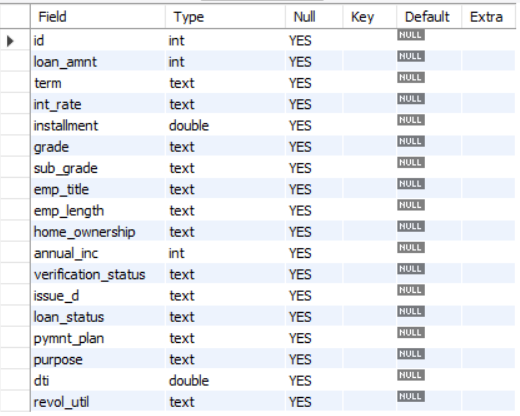

**Correcting the data types of the remaining columns -**

**int_rate**

In [ ]:
UPDATE loan_new
SET int_rate = REPLACE(int_rate, '%', '');

ALTER TABLE loan_new
MODIFY COLUMN int_rate FLOAT;

**issue_d**

In [ ]:
UPDATE loan_new
SET issue_d = STR_TO_DATE(CONCAT('01-', issue_d), '%d-%b-%y')
WHERE issue_d IS NOT NULL;

ALTER TABLE loan_new
MODIFY COLUMN issue_d DATE;

**term**

In [ ]:
UPDATE loan_new
SET term = TRIM(REPLACE(term, 'months', ''));

ALTER TABLE loan_new MODIFY COLUMN term INT;

SyntaxError: invalid syntax (ipython-input-3707548729.py, line 1)

**installment, annual_inc, dti**

In [ ]:
ALTER TABLE loan_new MODIFY COLUMN installment DECIMAL(10,2);
ALTER TABLE loan_new MODIFY COLUMN annual_inc DECIMAL(12,2);
ALTER TABLE loan_new MODIFY COLUMN dti DECIMAL(5,2);

**grade, sub_grade**

In [ ]:
UPDATE loan_new SET grade = UPPER(TRIM(grade));
UPDATE loan_new SET sub_grade = UPPER(TRIM(sub_grade));

**purpose**

In [ ]:
UPDATE loan_new SET purpose = TRIM(LOWER(purpose));



**emp_title**

In [ ]:
UPDATE loan_new SET emp_title = TRIM(LOWER(emp_title));

**emp_length**

In [ ]:
UPDATE loan_new
SET emp_length = CASE
  WHEN emp_length = '10+ years' THEN '10'
  WHEN emp_length = '9 years' THEN '9'
  WHEN emp_length = '8 years' THEN '8'
  WHEN emp_length = '7 years' THEN '7'
  WHEN emp_length = '6 years' THEN '6'
  WHEN emp_length = '5 years' THEN '5'
  WHEN emp_length = '4 years' THEN '4'
  WHEN emp_length = '3 years' THEN '3'
  WHEN emp_length = '2 years' THEN '2'
  WHEN emp_length = '1 year' THEN '1'
  WHEN emp_length = '< 1 year' THEN '0.5'
  ELSE NULL
END;

ALTER TABLE loan_new MODIFY COLUMN emp_length FLOAT;

**loan_status**

In [ ]:
UPDATE loan_new SET loan_status = TRIM(LOWER(loan_status));

**home_ownership**

In [ ]:
UPDATE loan_new SET home_ownership = UPPER(TRIM(home_ownership));

**verification_status**

In [ ]:
UPDATE loan_new SET verification_status = UPPER(TRIM(verification_status));

**revol_util**

In [ ]:
UPDATE loan_new SET revol_util = REPLACE(revol_util, '%', '');

-- getting error here
ALTER TABLE loan_new MODIFY COLUMN revol_util FLOAT;


-- checking what is wrong in this column
SELECT revol_util
FROM loan_new
WHERE revol_util IS NOT NULL
  AND revol_util NOT REGEXP '^[0-9]+(\.[0-9]+)?$';


-- blank values found, i will set those values to null
UPDATE loan_new
SET revol_util = NULL
WHERE revol_util = ''
   OR revol_util = 'NaN'
   OR revol_util IS NULL
   OR revol_util NOT REGEXP '^[0-9]+(\.[0-9]+)?$';


-- now making the final data type change
ALTER TABLE loan_new MODIFY COLUMN revol_util FLOAT;

**Changing the data types of certain columns from text to varchar**

In [ ]:
ALTER TABLE loan_new
MODIFY COLUMN grade VARCHAR(5),
MODIFY COLUMN sub_grade VARCHAR(5),
MODIFY COLUMN emp_title VARCHAR(100),
MODIFY COLUMN home_ownership VARCHAR(20),
MODIFY COLUMN verification_status VARCHAR(30),
MODIFY COLUMN loan_status VARCHAR(50),
MODIFY COLUMN pymnt_plan VARCHAR(10),
MODIFY COLUMN purpose VARCHAR(50);

**Checking for duplicates**

In [ ]:
SELECT COUNT(*) FROM loan_new;

SELECT COUNT(DISTINCT id) FROM loan_new;

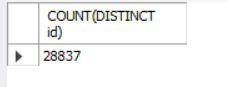

No duplicates are found as the count of the dataset is equal to the distinct count

**Re checking all the columns after making the above changes**

In [ ]:
DESCRIBE loan_new;

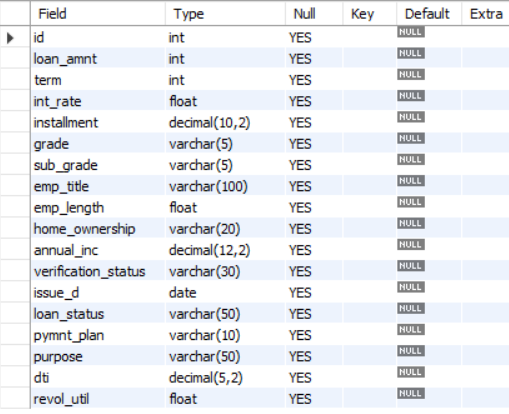

**Checking for any null values**

In [ ]:
SELECT
  COUNT(CASE WHEN id IS NULL OR id = 'na' THEN 1 END) AS id_nulls,
  COUNT(CASE WHEN loan_amnt IS NULL OR loan_amnt = 'na' THEN 1 END) AS loan_amnt_nulls,
  COUNT(CASE WHEN installment IS NULL OR installment = 'na' THEN 1 END) AS installment_nulls,
  COUNT(CASE WHEN term IS NULL OR term = '' OR term = 'na' THEN 1 END) AS term_nulls,
  COUNT(CASE WHEN int_rate IS NULL OR int_rate = '' OR int_rate = 'na' THEN 1 END) AS int_rate_nulls,
  COUNT(CASE WHEN annual_inc IS NULL OR annual_inc = 'na' THEN 1 END) AS annual_inc_nulls,
  COUNT(CASE WHEN dti IS NULL OR dti = 'na' THEN 1 END) AS dti_nulls,
  COUNT(CASE WHEN loan_status IS NULL OR loan_status = '' OR loan_status = 'na' THEN 1 END) AS loan_status_nulls,
  COUNT(CASE WHEN emp_length IS NULL OR emp_length = '' OR emp_length = 'na' THEN 1 END) AS emp_length_nulls,
  COUNT(CASE WHEN emp_title IS NULL OR emp_title = '' OR emp_title IN ('na', 'n/a', 'none') THEN 1 END) AS emp_title_nulls,
  COUNT(CASE WHEN purpose IS NULL OR purpose = 'na' THEN 1 END) AS purpose_nulls,
  COUNT(CASE WHEN issue_d IS NULL THEN 1 END) AS issue_d_nulls,
  COUNT(CASE WHEN grade IS NULL OR grade = '' OR grade = 'na' THEN 1 END) AS grade_nulls,
  COUNT(CASE WHEN sub_grade IS NULL OR sub_grade = '' OR sub_grade = 'na' THEN 1 END) AS sub_grade_nulls,
  COUNT(CASE WHEN home_ownership IS NULL OR home_ownership = '' OR home_ownership = 'na' THEN 1 END) AS home_ownership_nulls,
  COUNT(CASE WHEN verification_status IS NULL OR verification_status = '' OR verification_status = 'na' THEN 1 END) AS verification_status_nulls,
  COUNT(CASE WHEN revol_util IS NULL OR revol_util = '' OR revol_util = 'na' THEN 1 END) AS revol_util_nulls,
  COUNT(CASE WHEN pymnt_plan IS NULL OR pymnt_plan = '' OR pymnt_plan = 'na' THEN 1 END) AS pymnt_plan
FROM loan_new;

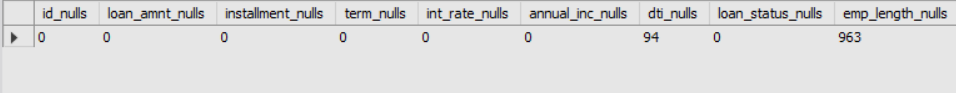

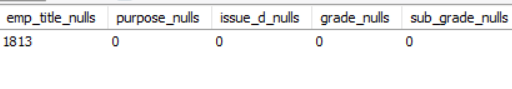

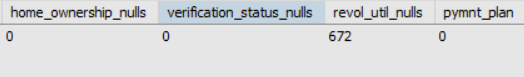

From the above output, dti, emp_length, emp_title and revol_util have null values of 94, 963, 1813 and 672 respectively.
Since my dataset has 28,873 rows in total, for:

**dti :** For this column, I will be imputing with Median as the percentage of missing values is quite low (approx 0.33%)  

**emp_length:** For this column, I have replaced missing values with 'unknown' instead of imputing.

**emp_title:** For this column, I have replaced missing values with 'unknown' instead of imputing.

**revol_util:** For this column, I will be imputing with Median.

**Handling Null Values**

**dti:** roughly seeing the type of distribution to check whether it is left/right skewed or normal distribution, so as to decide whether to impute with mean or median

In [ ]:
SELECT
  CASE
    WHEN dti < 10 THEN '<10'
    WHEN dti BETWEEN 10 AND 20 THEN '10-20'
    WHEN dti BETWEEN 20 AND 30 THEN '20-30'
    WHEN dti BETWEEN 30 AND 50 THEN '30-50'
    WHEN dti >= 50 THEN '50+'
    ELSE 'Missing'
  END AS dti_bucket,
  COUNT(*) AS count
FROM loan_new
GROUP BY dti_bucket
ORDER BY count DESC;

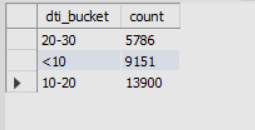

Since the distribution is right skewed, I will impute with median in the dti column.

In [ ]:
SELECT
  dti
FROM (
  SELECT dti,
         ROW_NUMBER() OVER (ORDER BY dti) AS row_num,
         COUNT(*) OVER () AS total_rows
  FROM loan_new
  WHERE dti IS NOT NULL
) AS ordered_dti
WHERE row_num = FLOOR((total_rows + 1) / 2);

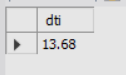

In [ ]:
UPDATE loan_new
SET dti = 13.68
WHERE dti IS NULL ;

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE dti IS NULL;

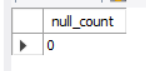

**emp_length :** For this column I replaced the null values with 'unknown'

In [ ]:
ALTER TABLE loan_new
MODIFY COLUMN emp_length VARCHAR(10);

In [ ]:
UPDATE loan_new
SET emp_length = 'unknown'
WHERE emp_length IS NULL OR emp_length IN ('n/a','na', '');

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE emp_length IS NULL;

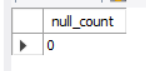

**emp_title**

In [ ]:
UPDATE loan_new
SET emp_title = 'unknown'
WHERE emp_title IS NULL OR emp_title = '';

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE emp_title IS NULL;

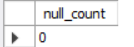

**revol_util**

In [ ]:
-- Get the total number of non-null rows
SELECT COUNT(*) AS non_null_count
FROM loan_new
WHERE revol_util IS NOT NULL;
-- 28817

-- offset = FLOOR(28817 / 2) = 14408  (to get median value)
SELECT revol_util
FROM loan_new
WHERE revol_util IS NOT NULL
ORDER BY revol_util
LIMIT 1 OFFSET 14408;

-- imputing with median
UPDATE loan_new
SET revol_util = 50.7
WHERE revol_util IS NULL;

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE revol_util IS NULL;

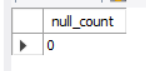

# **3. Borrower Risk Analysis**

**<h4>I. Risk Segmentation (EMI Stress Buckets)**

In [ ]:
-- adding risk segment column

ALTER TABLE loan_new
ADD COLUMN risk_segment VARCHAR(20);


UPDATE loan_new
SET risk_segment = CASE
    WHEN emi_to_income_ratio < 20 THEN 'Low Risk'
    WHEN emi_to_income_ratio BETWEEN 20 AND 40 THEN 'Moderate Risk'
    ELSE 'High Risk'
END;


-- Count & Percentage of borrowers in each segment

SELECT
    risk_segment,
    COUNT(*) AS borrower_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM loan_new), 2) AS percentage
FROM loan_new
GROUP BY risk_segment;

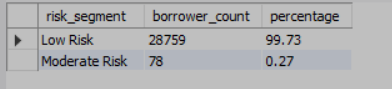

**<h4>II. Borrower Characteristics and Risk Behavior**

**1. Income vs Loan Amount**

In [ ]:
SELECT
    risk_segment,
    ROUND(AVG(annual_inc),2) AS avg_income,
    ROUND(AVG(loan_amnt),2) AS avg_loan_amount,
    ROUND(AVG(installment),2) AS avg_emi
FROM loan_new
GROUP BY risk_segment
ORDER BY FIELD(risk_segment, 'Low Risk','Moderate Risk');

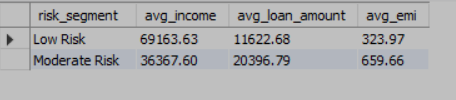

**Income matters:** Even if someone has a moderate loan, low income increases stress.

**Loan size matters:** Moderate Risk borrowers have larger loans relative to their income leading to higher EMI-to-Income ratio.

**EMI reflects risk:** EMI is almost double for Moderate Risk compared to Low Risk

Moderate Risk borrowers earn less but have larger loans and higher EMIs. Banks should monitor this segment closely, as they are more vulnerable to income shocks or interest rate hikes.

**2. DTI vs Risk Segment**

In [ ]:
SELECT
    risk_segment,
    ROUND(AVG(dti),2) AS avg_dti,
    COUNT(*) AS borrower_count
FROM loan_new
GROUP BY risk_segment;

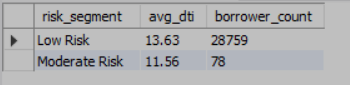

DTI alone does not fully explain EMI stress here.

Moderate Risk borrowers have higher EMIs relative to their income, even though DTI is lower, likely because their loan amount is large relative to their income.

EMI-to-Income captures short-term repayment burden, while DTI is more overall debt picture.

Moderate Risk borrowers have slightly lower total debt ratios but higher EMI burden relative to income. This shows banks should monitor EMI-to-Income more closely than DTI for early warning signals in approved borrowers.

**3. Revolving Credit Utilization vs Risk Segment**

In [ ]:
SELECT
    risk_segment,
    ROUND(AVG(revol_util),2) AS avg_revol_util,
    COUNT(*) AS borrower_count
FROM loan_new
GROUP BY risk_segment;

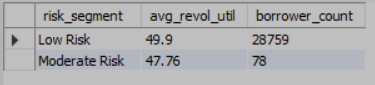

Revolving utilization does not directly drive EMI stress here.

Moderate Risk borrowers have higher EMI-to-Income ratios, even though they slightly underutilize revolving credit.

Indicates that loan size and income, not credit card usage, is the main driver of risk in this approved borrower dataset.

**4. Loan purpose vs stress**

In [ ]:
SELECT
    risk_segment,
    purpose,
    COUNT(*) AS borrower_count,
    ROUND(AVG(emi_to_income_ratio),2) AS avg_emi_to_income
FROM loan_new
GROUP BY risk_segment, purpose
ORDER BY risk_segment, avg_emi_to_income DESC;

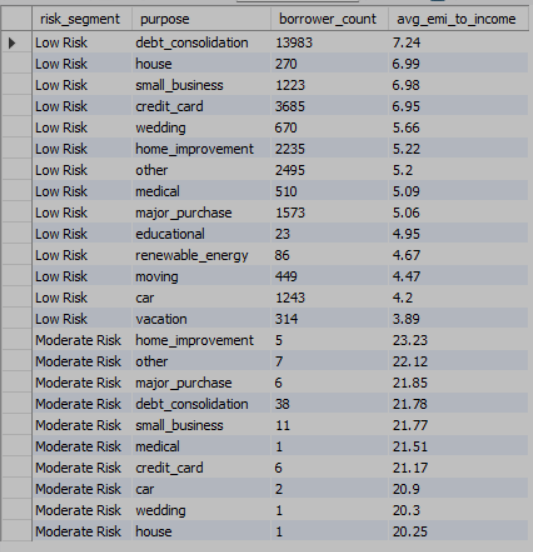

Debt Consolidation & Small Business Loans are high-volume categories; even a few moderate-risk borrowers in these can affect portfolio stability.

Moderate Risk borrowers, though few, carry high EMI-to-Income ratios, making them early warning candidates for monitoring.

Purpose alone does not determine stress; it interacts with income and loan size.

Banks should focus on EMI-to-Income ratio and risk segmentation rather than purely loan purpose when assessing borrower stress.

**<h4>III. Loan Risk Analysis (High-Value Metrics)**

**1. Loan Term vs EMI Stress**

In [ ]:
SELECT
    term,
    COUNT(*) AS borrower_count,
    ROUND(AVG(emi_to_income_ratio),2) AS avg_emi_to_income,
    ROUND(SUM(CASE WHEN risk_segment='Moderate Risk' THEN 1 ELSE 0 END)/COUNT(*)*100,2) AS pct_moderate_risk
FROM loan_new
GROUP BY term
ORDER BY term;


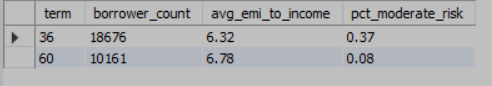

Shorter-tenure loans increase monthly EMI stress, even for approved borrowers.

Longer tenure reduces stress, making repayment more manageable.

**2. Interest Rate vs EMI Stress**

In [ ]:
SELECT
    CASE
        WHEN int_rate < 10 THEN '<10%'
        WHEN int_rate BETWEEN 10 AND 15 THEN '10-15%'
        WHEN int_rate BETWEEN 15 AND 20 THEN '15-20%'
        ELSE '20%+'
    END AS int_rate_bucket,
    COUNT(*) AS borrower_count,
    ROUND(AVG(emi_to_income_ratio),2) AS avg_emi_to_income,
    ROUND(SUM(CASE WHEN risk_segment='Moderate Risk' THEN 1 ELSE 0 END)/COUNT(*)*100,2) AS pct_moderate_risk
FROM loan_new
GROUP BY int_rate_bucket
ORDER BY int_rate_bucket;


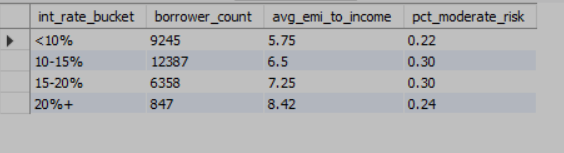

Higher EMI-to-Income increases stress, most moderate-risk borrowers fall in the 10–20% range. We need to focus monitoring here.

**3. Loan Grade vs EMI Stress**

In [ ]:
SELECT
    grade,
    COUNT(*) AS borrower_count,
    ROUND(AVG(emi_to_income_ratio),2) AS avg_emi_to_income,
    ROUND(SUM(CASE WHEN risk_segment='Moderate Risk' THEN 1 ELSE 0 END)/COUNT(*)*100,2) AS pct_moderate_risk
FROM loan_new
GROUP BY grade
ORDER BY grade;


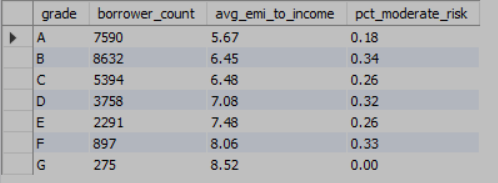

EMI-to-Income rises from grade A to F, but moderate-risk borrowers also exist in B and D grades.    Traditional credit grades do not fully capture EMI stress, monitoring should include EMI-to-Income, not just grade.

**<h4>IV. Portfolio Stress Simulation**

**10% income drop + 2% interest rate hike**

In [ ]:
ALTER TABLE loan_new
ADD COLUMN emi_stress FLOAT,
ADD COLUMN emi_to_income_stress FLOAT,
ADD COLUMN risk_segment_stress VARCHAR(20);


UPDATE loan_new
SET emi_stress = ROUND(
    loan_amnt * (( (int_rate + 2)/100/12 ) * POW(1 + ( (int_rate + 2)/100/12 ), term)) /
    (POW(1 + ((int_rate + 2)/100/12), term) - 1), 2
)
WHERE id IS NOT NULL;


UPDATE loan_new
SET emi_to_income_stress = ROUND((emi_stress * 12 * 100.0) / (annual_inc * 0.9), 2)
WHERE id IS NOT NULL;


UPDATE loan_new
SET risk_segment_stress = CASE
    WHEN emi_to_income_stress < 20 THEN 'Low Risk'
    WHEN emi_to_income_stress BETWEEN 20 AND 40 THEN 'Moderate Risk'
END
WHERE id IS NOT NULL;


In [ ]:
SELECT
    risk_segment_stress,
    COUNT(*) AS borrower_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM loan_new), 2) AS percentage
FROM loan_new
GROUP BY risk_segment_stress;


SELECT COUNT(*) AS shifted_to_moderate
FROM loan_new
WHERE risk_segment = 'Low Risk'
  AND risk_segment_stress = 'Moderate Risk';

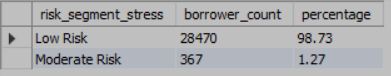

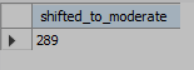

**Understanding why 289 users shifted from low to moderate risk**

**By Loan Purpose**

In [ ]:
SELECT
    purpose,
    COUNT(*) AS shifted_count
FROM loan_new
WHERE risk_segment = 'Low Risk'
  AND risk_segment_stress = 'Moderate Risk'
GROUP BY purpose
ORDER BY shifted_count DESC;


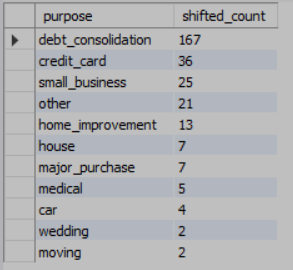

**By Loan Grade**

In [ ]:
SELECT
    grade,
    COUNT(*) AS shifted_count
FROM loan_new
WHERE risk_segment = 'Low Risk'
  AND risk_segment_stress = 'Moderate Risk'
GROUP BY grade
ORDER BY shifted_count DESC;


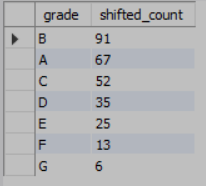

**By Loan Term**

In [ ]:
SELECT
    term,
    COUNT(*) AS shifted_count
FROM loan_new
WHERE risk_segment = 'Low Risk'
  AND risk_segment_stress = 'Moderate Risk'
GROUP BY term;


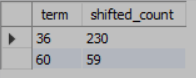

**By Income Buckets**

In [ ]:
WITH income_classified AS (
    SELECT
        CASE
            WHEN annual_inc < 40000 THEN '<40k'
            WHEN annual_inc BETWEEN 40000 AND 80000 THEN '40k-80k'
            WHEN annual_inc BETWEEN 80000 AND 120000 THEN '80k-120k'
            ELSE '120k+'
        END AS income_bucket
    FROM loan_new
    WHERE risk_segment = 'Low Risk'
      AND risk_segment_stress = 'Moderate Risk'
)
SELECT income_bucket, COUNT(*) AS shifted_count
FROM income_classified
GROUP BY income_bucket
ORDER BY shifted_count DESC;


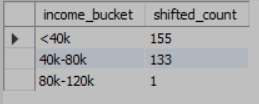

The borrowers who are most vulnerable to income shocks are:

**1. Low-to-Mid Income Borrowers (<80k)**

They make up almost all stress shifts.

Even small income drops push them into moderate EMI stress.

<br>

**2. Debt Consolidation & Credit Card Loans**

Together, they dominate stress shifts.

These borrowers are already managing multiple debts, so adding a new EMI makes their finances more fragile.

<br>

**3. Shorter-Term Loans (36 months)**

Majority of stress shifts come from here.

Higher EMIs (due to shorter repayment window) make them highly sensitive to income drops.

<br>

**4. Grades A & B (Prime Borrowers)**

Surprisingly, many stress shifts happen here.

This suggests that traditional credit grades may underestimate EMI stress, since a strong credit history doesn’t always guarantee repayment comfort when incomes fall.

**Borrowers with low-to-mid incomes taking high-EMI loans (often for debt consolidation/credit cards), especially on shorter tenures, are the most vulnerable.**

<br>

**<h4>RECOMMENDATIONS:**  
<br>
**EMI Stress Tests**

We can simulate a 10–20% income drop at loan approval stage.

Then approve or restructure based on whether the borrower stays in safe stress buckets.

<br>

**Affordability Score with Credit Grades**

Combine traditional grades (A–G) with an “EMI-to-Income score”.

This gives a more accurate idea of repayment comfort, even for Grade A/B borrowers.

<br>

**Purpose-Specific Risk Monitoring**

We need to pay special attention to debt consolidation and credit card loans, which dominate stress shifts.

Building early warning dashboards by loan purpose can also be done.

**<h4>V. High-Risk Personas**

**1. Borrower Risk by Income and Home Ownership**

In [ ]:
-- Income Bucket + Home Ownership
SELECT
  income_bucket,
  home_ownership,
  COUNT(*) AS total_loans,
  SUM(default_flag) AS total_defaults,
  ROUND(SUM(default_flag)/COUNT(*) * 100, 2) AS default_rate_pct
FROM loan_new
GROUP BY income_bucket, home_ownership
ORDER BY income_bucket, home_ownership;

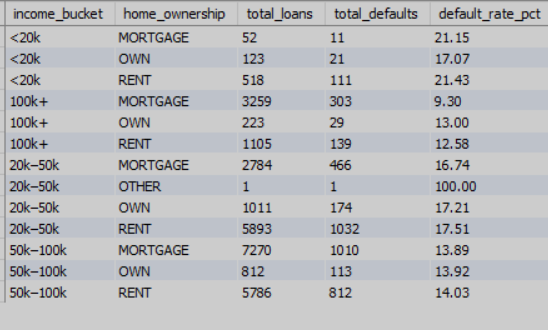

Borrowers earning <20k have the highest default rates, especially renters (21.43%) and mortgage holders (21.15%). Default risk generally decreases with income, and home ownership mainly impacts risk at lower income levels.

**2. Do renters having low-income and high-interest loans default the most?**

In [ ]:
-- income + interest

SELECT
    home_ownership,
    income_bucket,
    COUNT(*) AS total_loans,
    SUM(default_flag) AS total_defaults,
    ROUND(SUM(default_flag) / COUNT(*) * 100, 2) AS default_rate_percent
FROM loan_new
GROUP BY home_ownership, income_bucket
ORDER BY default_rate_percent DESC;

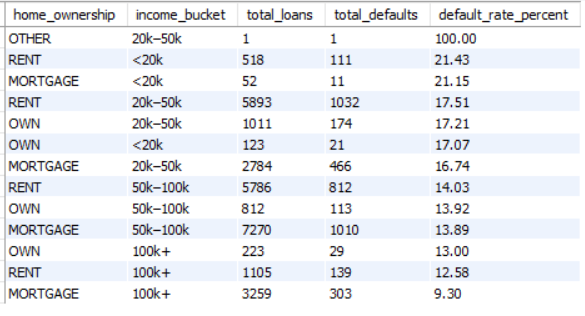

Low-income borrowers (<20k) are most at risk, especially renters and mortgage holders. Default rates decline as income rises, and home ownership mainly affects risk at lower incomes.

**3. Are high DTI and high revol_util (credit card usage) borrowers the most risky?**

In [ ]:
-- creating dti bucket

ALTER TABLE loan_new ADD COLUMN dti_bucket VARCHAR(20);

UPDATE loan_new
SET dti_bucket =
    CASE
        WHEN dti < 10 THEN 'Low DTI'
        WHEN dti BETWEEN 10 AND 20 THEN 'Medium DTI'
        ELSE 'High DTI'
    END;

In [ ]:
-- create revol_util bucket

ALTER TABLE loan_new ADD COLUMN revol_util_bucket VARCHAR(20);

UPDATE loan_new
SET revol_util_bucket =
    CASE
        WHEN revol_util < 30 THEN 'Low Util'
        WHEN revol_util BETWEEN 30 AND 70 THEN 'Medium Util'
        ELSE 'High Util'
    END;

In [ ]:
-- combining both

SELECT
    dti_bucket,
    revol_util_bucket,
    COUNT(*) AS total_loans,
    SUM(default_flag) AS total_defaults,
    ROUND(SUM(default_flag) / COUNT(*) * 100, 2) AS default_rate_percent
FROM loan_new
GROUP BY dti_bucket, revol_util_bucket
ORDER BY default_rate_percent DESC;


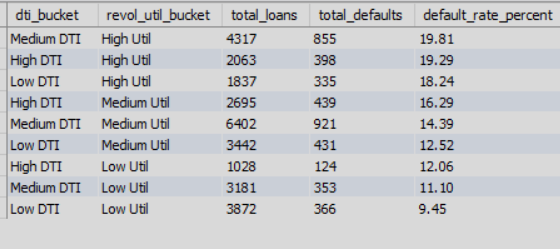

Borrowers with high revolving credit utilization face the highest default risk, even if their DTI is low. Low utilization keeps risk low, showing that credit usage is a stronger predictor of default than DTI.

# **Final Insight**

**Income & Loan Size:** Low-to-mid income borrowers with large EMIs relative to income are the most vulnerable, even among approved borrowers.

**Loan Term & Type:** Short-term loans, debt consolidation, and credit card loans increase repayment stress.

**Credit Grades:** Traditional credit grades (A–F) do not fully capture EMI stress; moderate-risk borrowers exist across all grades.

**Revolving Utilization:** High revolving credit usage is a stronger predictor of default than DTI alone.

**Stress Testing:** Simulated scenarios (e.g., 10% income drop + 2% interest hike) reveal hidden vulnerabilities, including among prime borrowers.

**Recommendation:** Banks should monitor EMI-to-Income ratios, moderate-risk borrowers, and low-income, high-utilization segments to reduce potential defaults and maintain portfolio stability.